# Loan Prediction

### Libraries Used

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, classification_report, jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# importing data
data = pd.read_csv("train.csv")

### Exploratory Data Analysis

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


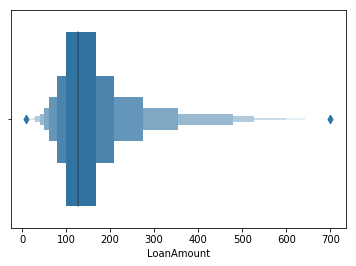

In [5]:
_=sns.boxenplot(x='LoanAmount',data=data)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


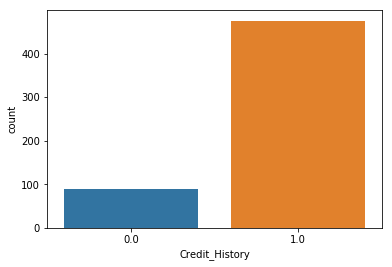

In [7]:
sns.countplot(data.Credit_History)

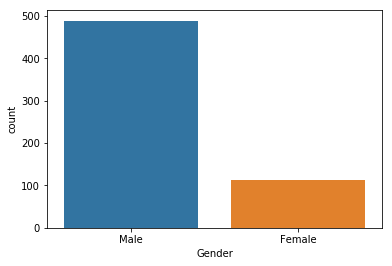

In [8]:
sns.countplot(data.Gender)

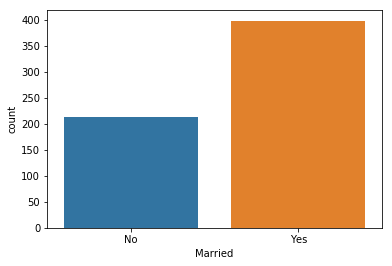

In [9]:
sns.countplot(data.Married)

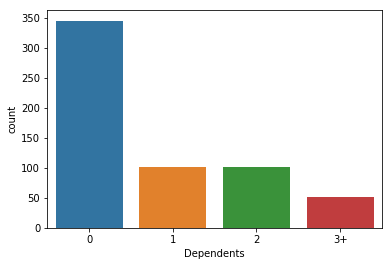

In [10]:
sns.countplot(data.Dependents)

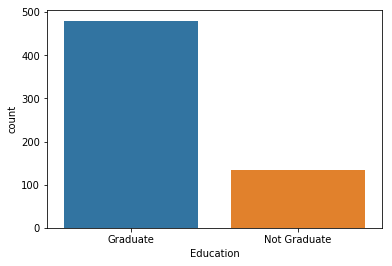

In [11]:
sns.countplot(data.Education)

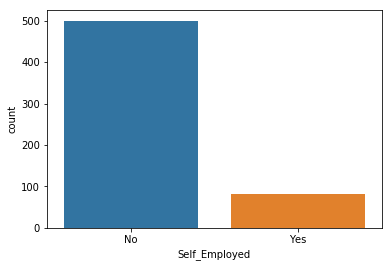

In [12]:
sns.countplot(data.Self_Employed)

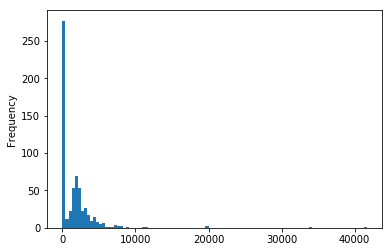

In [13]:
data['CoapplicantIncome'].plot.hist(bins=100)

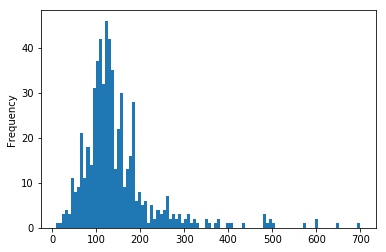

In [14]:
data['LoanAmount'].plot.hist(bins=100)

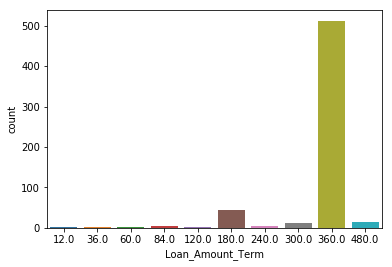

In [15]:
sns.countplot(data['Loan_Amount_Term'])

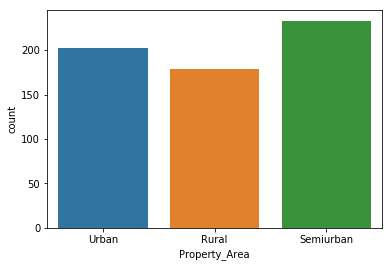

In [16]:
sns.countplot(data.Property_Area)

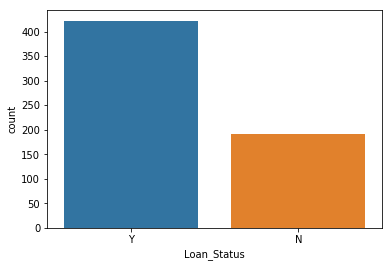

In [17]:
sns.countplot(data.Loan_Status)

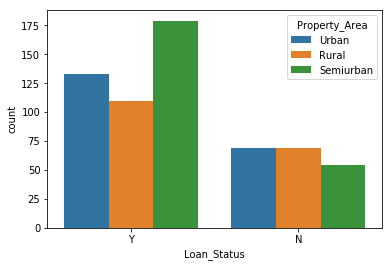

In [18]:
sns.countplot(data.Loan_Status,hue=data.Property_Area)

Text(0, 0.5, 'Loan Amount')

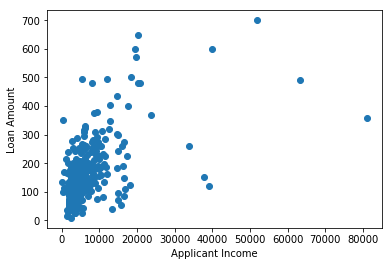

In [19]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

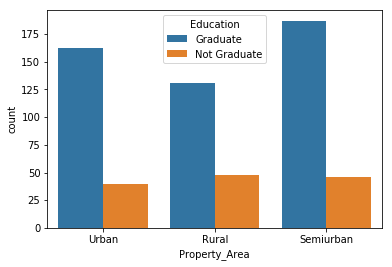

In [20]:
sns.countplot(data.Property_Area,hue=data.Education)

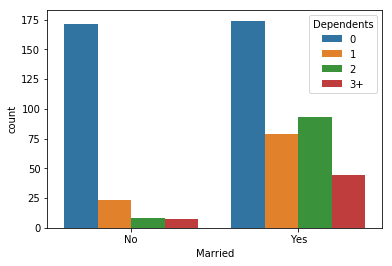

In [21]:
sns.countplot(data.Married,hue=data.Dependents)

### Examining null values

#### We generally fill the missing values with either mean or median or mode rather than removing them.

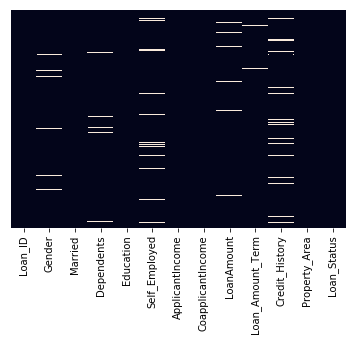

In [22]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [23]:
# imputing null values
data['Gender'].fillna(data['Gender'].mode().iloc[0],inplace = True)
data['Married'].fillna(data['Married'].mode().iloc[0],inplace = True)
data['Dependents'].fillna(data['Dependents'].mode().iloc[0],inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode().iloc[0],inplace = True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace = True)

data['Credit_History'] = data['Credit_History'].astype('category')
data.Credit_History.fillna(data.Credit_History.mode().iloc[0],inplace = True)

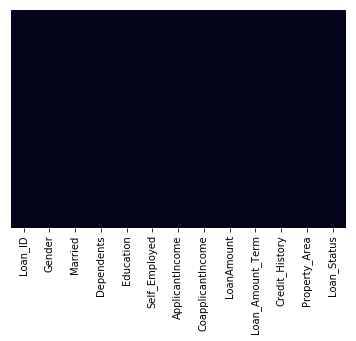

In [24]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [25]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

In [27]:
for i in cat_cols:
    print(data[i].value_counts())
    print()   

Male      502
Female    112
Name: Gender, dtype: int64

Yes    401
No     213
Name: Married, dtype: int64

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     532
Yes     82
Name: Self_Employed, dtype: int64

1.0    525
0.0     89
Name: Credit_History, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



In [28]:
data.drop_duplicates(keep=False,inplace=True) 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null category
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: category(1), float64(3), int64(1), object(8)
memory usage: 63.1+ KB


In [30]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000
std,6109.041673,2926.248369,84.037468,64.372489
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [31]:
for i in cat_cols:
    print(data.groupby(i)['LoanAmount'].mean()) 
    print()

Gender
Female    127.225326
Male      150.692891
Name: LoanAmount, dtype: float64

Married
No     129.459555
Yes    155.416914
Name: LoanAmount, dtype: float64

Dependents
0     135.995439
1     158.143614
2     150.111252
3+    189.153418
Name: LoanAmount, dtype: float64

Education
Graduate        153.821213
Not Graduate    119.872277
Name: LoanAmount, dtype: float64

Self_Employed
No     142.612464
Yes    171.063860
Name: LoanAmount, dtype: float64

Credit_History
0.0    146.703917
1.0    146.362703
Name: LoanAmount, dtype: float64

Property_Area
Rural        152.064095
Semiurban    145.523866
Urban        142.428385
Name: LoanAmount, dtype: float64

Loan_Status
N    150.945488
Y    144.349606
Name: LoanAmount, dtype: float64



In [32]:
for i in cat_cols:
    print(data.groupby(i)['ApplicantIncome'].mean()) 
    print()

Gender
Female    4643.473214
Male      5573.017928
Name: ApplicantIncome, dtype: float64

Married
No     4970.384977
Yes    5633.496259
Name: ApplicantIncome, dtype: float64

Dependents
0     4928.680556
1     5962.274510
2     4926.782178
3+    8581.215686
Name: ApplicantIncome, dtype: float64

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

Self_Employed
No     5098.678571
Yes    7380.817073
Name: ApplicantIncome, dtype: float64

Credit_History
0.0    5679.438202
1.0    5356.674286
Name: ApplicantIncome, dtype: float64

Property_Area
Rural        5554.083799
Semiurban    5292.261803
Urban        5398.247525
Name: ApplicantIncome, dtype: float64

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64



In [33]:
# saving the cleaned dataset
data.to_csv('loan_prediction_data.csv',index=False)

In [34]:
loan = pd.read_csv('loan_prediction_data.csv')

In [35]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [36]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [37]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [38]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Preprocessing

In [39]:
# creating training and testing data
x = loan.iloc[:,1:13]
x = pd.get_dummies(x,drop_first=True)
names = x.columns
y = x.iloc[:,-1].values
x = x.iloc[:,:-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0)

In [40]:
# scailing data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

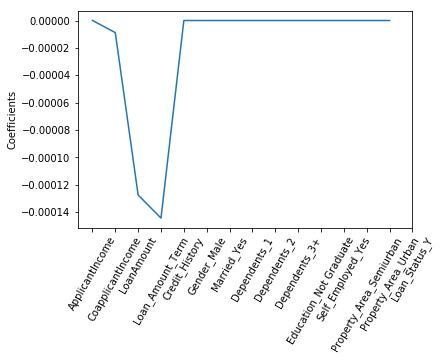

In [41]:
# Identifing most important features
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(x,y).coef_

_ = plt.plot(range(14),lasso_coef)
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel('Coefficients')
plt.show()

In [42]:
acc_cmp = []

### LogisticRegression

In [43]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

acc_cmp.append(["Logistic Regression",jaccard_similarity_score(y_test,y_pred)])

print(confusion_matrix(y_test,y_pred))
print()
print(jaccard_similarity_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 22  29]
 [  2 132]]

0.8324324324324325

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

   micro avg       0.83      0.83      0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [44]:
# cross validation
classifier1 = LogisticRegression()
sc_1 = StandardScaler()
x = sc_1.fit_transform(x)
cv_scores = cross_val_score(classifier1,x,y,cv=5)
np.mean(cv_scores)

C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

0.8063194077207827

In [45]:
# hyper parameter tuning for logistic regression
c_space = np.logspace(-5,8,15)
paramgrid = {'C':c_space,
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}
classifier2 = LogisticRegression(random_state=0)
classifier2_cv = RandomizedSearchCV(classifier2,paramgrid,cv=5)
classifier2_cv.fit(x_train,y_train)

print(classifier2_cv.best_params_)

y_pred1 = classifier2_cv.predict(x_test)

print(confusion_matrix(y_test,y_pred1))
print(jaccard_similarity_score(y_test,y_pred1))

{'solver': 'lbfgs', 'C': 0.4393970560760795}
[[ 22  29]
 [  2 132]]
0.8324324324324325


### K-NN

In [46]:
paramgrid1 = {'n_neighbors':np.arange(1,30),
              'p':[1,2]}
classifier3 = KNeighborsClassifier()
classifier3_cv = GridSearchCV(classifier3,paramgrid1,cv=5)
classifier3_cv.fit(x_train,y_train)

print(classifier3_cv.best_params_)

y_pred2 = classifier3_cv.predict(x_test)
acc_cmp.append(["K-NN",jaccard_similarity_score(y_test,y_pred2)])

print()
print(confusion_matrix(y_test,y_pred2))
print()
print(jaccard_similarity_score(y_test,y_pred2))
print()
print(classification_report(y_test,y_pred2))

{'n_neighbors': 26, 'p': 2}

[[ 15  36]
 [  1 133]]

0.8

              precision    recall  f1-score   support

           0       0.94      0.29      0.45        51
           1       0.79      0.99      0.88       134

   micro avg       0.80      0.80      0.80       185
   macro avg       0.86      0.64      0.66       185
weighted avg       0.83      0.80      0.76       185



C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Decision Tree

In [47]:
paramgrid2 = {"max_depth":[3,None],
              "max_features":np.arange(1,9),
              "min_samples_leaf":np.arange(1,9),
              "criterion":["gini","entropy"]}
classifier4 = DecisionTreeClassifier(random_state=0)
classifier4_cv = GridSearchCV(classifier4,paramgrid2,cv=5)
classifier4_cv.fit(x_train,y_train)

print(classifier4_cv.best_params_)

y_pred3 = classifier4_cv.predict(x_test)
acc_cmp.append(["Decision Tree",jaccard_similarity_score(y_test,y_pred3)])

print()
print(confusion_matrix(y_test,y_pred3))
print()
print(jaccard_similarity_score(y_test,y_pred3))
print()
print(classification_report(y_test,y_pred3))

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1}

[[ 21  30]
 [  3 131]]

0.8216216216216217

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

   micro avg       0.82      0.82      0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Random Forest

In [48]:
paramgrid3 = {"n_estimators":[10,50,100,150,200,250,300],
              "criterion":["entropy","gini"]}
classifier5 = RandomForestClassifier(random_state=0)
classifier5_cv = GridSearchCV(classifier5,paramgrid3,cv=5)
classifier5_cv.fit(x_train,y_train)

print(classifier5_cv.best_params_)

y_pred4 = classifier5_cv.predict(x_test)
acc_cmp.append(["Random Forest",jaccard_similarity_score(y_test,y_pred4)])

print()
print(confusion_matrix(y_test,y_pred4))
print()
print(jaccard_similarity_score(y_test,y_pred4))
print()
print(classification_report(y_test,y_pred4))

{'criterion': 'gini', 'n_estimators': 150}

[[ 22  29]
 [  6 128]]

0.8108108108108109

              precision    recall  f1-score   support

           0       0.79      0.43      0.56        51
           1       0.82      0.96      0.88       134

   micro avg       0.81      0.81      0.81       185
   macro avg       0.80      0.69      0.72       185
weighted avg       0.81      0.81      0.79       185



C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Support Vector Machine

In [49]:
classifier6 = SVC(kernel='rbf')
classifier6.fit(x_train,y_train)
y_pred5 = classifier6.predict(x_test)
acc_cmp.append(["Support Vector Machine",jaccard_similarity_score(y_test,y_pred5)])
print()
print(confusion_matrix(y_test,y_pred5))
print()
print(jaccard_similarity_score(y_test,y_pred5))
print()
print(classification_report(y_test,y_pred5))


[[ 22  29]
 [  3 131]]

0.827027027027027

              precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.82      0.98      0.89       134

   micro avg       0.83      0.83      0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185



### Naive-Bias

In [50]:
classifier7 = GaussianNB()
classifier7.fit(x_train,y_train)
y_pred6 = classifier7.predict(x_test)

acc_cmp.append(["Naive Bais",jaccard_similarity_score(y_test,y_pred6)])

print(confusion_matrix(y_test,y_pred6))
print()
print(jaccard_similarity_score(y_test,y_pred6))
print()
print(classification_report(y_test,y_pred6))

[[ 22  29]
 [  4 130]]

0.8216216216216217

              precision    recall  f1-score   support

           0       0.85      0.43      0.57        51
           1       0.82      0.97      0.89       134

   micro avg       0.82      0.82      0.82       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.83      0.82      0.80       185



### Accuracy Comparision of all algos

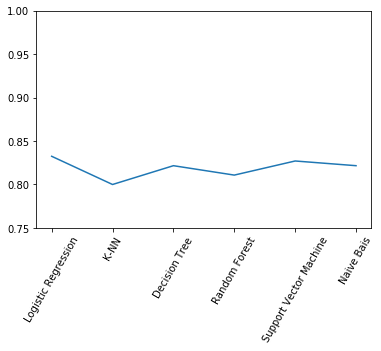

In [51]:
acc_cmp = pd.DataFrame(acc_cmp)
_ = plt.plot(acc_cmp[1])
_ = plt.xticks(range(len(acc_cmp[0])),acc_cmp[0],rotation=60)
_ = plt.ylim(0.75,1)
plt.show()

## Best algorithm comes out to be Logistic Regression with 83.24% accuracy